In [1]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais private room.csv')
df

id                                       listing_url  \
0     1.701540e+05               https://www.airbnb.com/rooms/170154   
1     1.726720e+05               https://www.airbnb.com/rooms/172672   
2     1.729770e+05               https://www.airbnb.com/rooms/172977   
3     1.873590e+05               https://www.airbnb.com/rooms/187359   
4     1.895820e+05               https://www.airbnb.com/rooms/189582   
...            ...                                               ...   
2594  1.252160e+18  https://www.airbnb.com/rooms/1252161427109288199   
2595  1.252190e+18  https://www.airbnb.com/rooms/1252186062122888637   
2596  1.252220e+18  https://www.airbnb.com/rooms/1252221965097369365   
2597  1.252300e+18  https://www.airbnb.com/rooms/1252302783564354993   
2598  1.252330e+18  https://www.airbnb.com/rooms/1252332854831287401   

      host_since            host_response_time host_response_rate  \
0     14/04/2010            within a few hours               100%   
1     15/07/2011                within an hour               100%   
2     16/07/2011                within an hour               100%   
3     01/08/2011            within a few hours                90%   
4     03/08/2011  Estado de manera desconocida               100%   
...          ...                           ...                ...   
2594  04/06/2015  Estado de manera desconocida               100%   
2595  03/04/2024  Estado de manera desconocida               100%   
2596  23/09/2024  Estado de manera desconocida               100%   
2597  24/01/2018  Estado de manera desconocida               100%   
2598  08/01/2024  Estado de manera desconocida               100%   

     host_acceptance_rate host_is_superhost  host_verifications  \
0                    100%                 t  ['email', 'phone']   
1                    100%                 f  ['email', 'phone']   
2                     67%                 t  ['email', 'phone']   
3                     77%                 f  ['email', 'phone']   
4                     87%                 f  ['email', 'phone']   
...                   ...               ...                 ...   
2594                 100%                 f  ['email', 'phone']   
2595                 100%                 f  ['email', 'phone']   
2596                 100%                 f           ['phone']   
2597                 100%                 f  ['email', 'phone']   
2598                 100%                 f  ['email', 'phone']   

      neighbourhood_cleansed                      property_type  ...  \
0          Sendling-Westpark               Private room in home  ...   
1             Schwabing-West        Private room in rental unit  ...   
2                Maxvorstadt        Private room in rental unit  ...   
3      Neuhausen-Nymphenburg        Private room in rental unit  ...   
4                Bogenhausen        Private room in rental unit  ...   
...                      ...                                ...  ...   
2594                Sendling        Private room in rental unit  ...   
2595  Feldmoching-Hasenbergl        Private room in rental unit  ...   
2596             Obergiesing  Private room in bed and breakfast  ...   
2597        Schwanthalerhöhe        Private room in rental unit  ...   
2598             Maxvorstadt        Private room in rental unit  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.99                  4.99   
1                         4.83                  4.98   
2                         4.91                  4.89   
3                         4.66                  4.98   
4                         4.86                  4.93   
...                        ...                   ...   
2594                      5.00                  4.80   
2595                      5.00                  4.80   
2596                      5.00                  4.80   
2597                      5.00                  4.80   
2598                      5.00      

In [4]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [5]:
# Remover comas y convertir a tipo float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

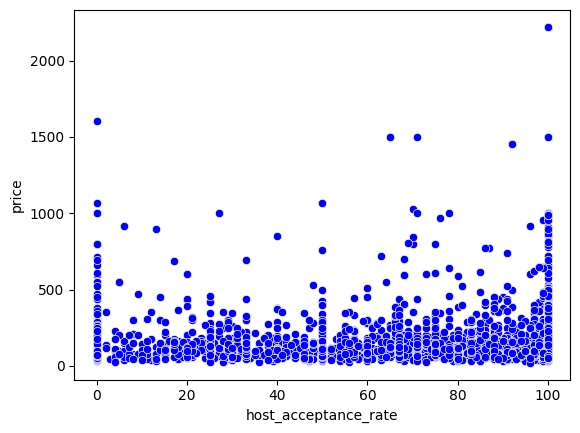

In [6]:
from turtle import color 

#la dependiente es la que intentas predecir 

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

In [7]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [8]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [10]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [11]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19063443]),
 'rank_': 1,
 'singular_': array([1727.0192785]),
 'intercept_': 168.32896283062615}

In [12]:
model.score(Vars_Indep,Vars_Dep)

0.0012869344489839785

In [13]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([187.39240588, 187.39240588, 181.10146967, ..., 187.39240588,
       187.39240588, 187.39240588])

In [14]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones            id  \
0       187.392406  1.701540e+05   
1       187.392406  1.726720e+05   
2       181.101470  1.729770e+05   
3       183.007814  1.873590e+05   
4       184.914158  1.895820e+05   
...            ...           ...   
2594    187.392406  1.252160e+18   
2595    187.392406  1.252190e+18   
2596    187.392406  1.252220e+18   
2597    187.392406  1.252300e+18   
2598    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               within a few hours               100%                 100.0   
1                   within an hour               100%                 100.0   
2                   within an hour               100%                  67.0   
3               within a few hours                90%                  77.0   
4     Estado de manera desconocida               100%                  87.0   
...                            ...                ...                   ...   
2594  Estado de manera desconocida               100%                 100.0   
2595  Estado de manera desconocida               100%                 100.0   
2596  Estado de manera desconocida               100%                 100.0   
2597  Estado de manera desconocida               100%                 100.0   
2598  Estado de manera desconocida               100%                 100.0   

     host_is_superhost  host_verifications  neighbourhood_cleansed  ...  \
0                    t  ['email', 'phone']       Sendling-Westpark  ...   
1                    f  ['email', 'phone']          Schwabing-West  ...   
2                    t  ['email', 'phone']             Maxvorstadt  ...   
3                    f  ['email', 'phone']   Neuhausen-Nymphenburg  ...   
4                    f  ['email', 'phone']             Bogenhausen  ...   
...                ...                 ...                     ...  ...   
2594                 f  ['email', 'phone']                Sendling  ...   
2595                 f  ['email', 'phone']  Feldmoching-Hasenbergl  ...   
2596                 f           ['phone']             Obergiesing  ...   
2597                 f  ['email', 'phone']        Schwanthalerhöhe  ...   
2598                 f  ['email', 'phone']             Maxvorstadt  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.99                  4.99   
1                         4.83                  4.98   
2                         4.91                  4.89   
3                         4.66                  4.98   
4                         4.86                  4.93   
...                        ...                   ...   
2594                      5.00                  4.80   
2595                      5.00                  4.80   
2596                      5.00                  4.80   
2597                      5.00                  4.80   
2598                      5.00                  4.80   

     review_scores_communication review_scores_location  review_scores_value  \
0                           4.98                   4.77                 4.91   
1                           4.92                 

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

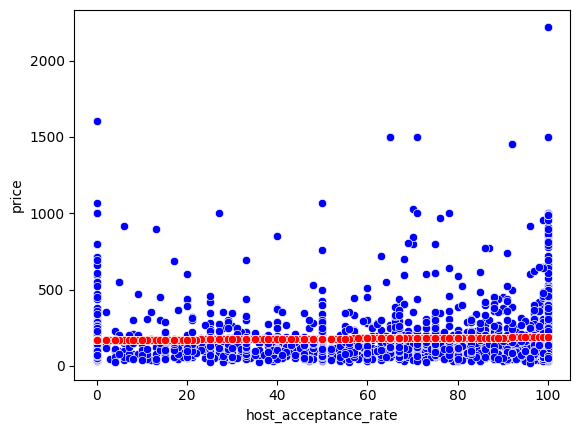

In [15]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0012869344489839785

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.03587386860911405

**Price vs host_is_superhost**

In [18]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

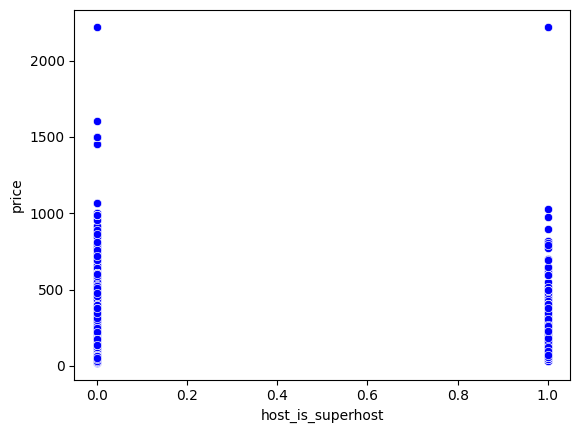

In [19]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [20]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [22]:
#Veerficamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [24]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-13.12699504]),
 'rank_': 1,
 'singular_': array([20.03352327]),
 'intercept_': 183.89110794103658}

In [25]:
model1.score(Vars_Indep1,Vars_Dep1)

0.0008211163208662331

In [26]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([170.7641129 , 183.89110794, 170.7641129 , ..., 183.89110794,
       183.89110794, 183.89110794])

In [27]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones            id  \
0        170.764113    187.392406  1.701540e+05   
1        183.891108    187.392406  1.726720e+05   
2        170.764113    181.101470  1.729770e+05   
3        183.891108    183.007814  1.873590e+05   
4        183.891108    184.914158  1.895820e+05   
...             ...           ...           ...   
2594     183.891108    187.392406  1.252160e+18   
2595     183.891108    187.392406  1.252190e+18   
2596     183.891108    187.392406  1.252220e+18   
2597     183.891108    187.392406  1.252300e+18   
2598     183.891108    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               within a few hours               100%                 100.0   
1                   within an hour               100%                 100.0   
2                   within an hour               100%                  67.0   
3               within a few hours                90%                  77.0   
4     Estado de manera desconocida               100%                  87.0   
...                            ...                ...                   ...   
2594  Estado de manera desconocida               100%                 100.0   
2595  Estado de manera desconocida               100%                 100.0   
2596  Estado de manera desconocida               100%                 100.0   
2597  Estado de manera desconocida               100%                 100.0   
2598  Estado de manera desconocida               100%                 100.0   

      host_is_superhost  host_verifications  ... review_scores_cleanliness  \
0                     1  ['email', 'phone']  ...                      4.99   
1                     0  ['email', 'phone']  ...                      4.83   
2                     1  ['email', 'phone']  ...                      4.91   
3                     0  ['email', 'phone']  ...                      4.66   
4                     0  ['email', 'phone']  ...                      4.86   
...                 ...                 ...  ...                       ...   
2594                  0  ['email', 'phone']  ...                      5.00   
2595                  0  ['email', 'phone']  ...                      5.00   
2596                  0           ['phone']  ...                      5.00   
2597                  0  ['email', 'phone']  ...                      5.00   
2598                  0  ['email', 'phone']  ...                      5.00   

     review_scores_checkin review_scores_communication review_scores_location  \
0                     4.99                        4.98                   4.77   
1                     4.98                        4.92                   4.86   
2                     4.89                        4.88                   4.82   
3                     4.98                        4.96                   4.78   
4                     4.93                        4.90                   4.64   
...                    ...                         ...                    ...   
2594                  4.80                        5.00                   4.90   
2595              

<Axes: xlabel='host_is_superhost', ylabel='price'>

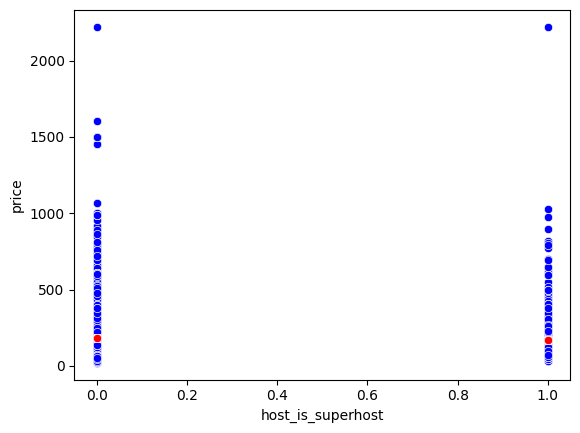

In [28]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [29]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

0.0008211163208662331

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.028655127305008316

**bathrooms vs accommodates**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

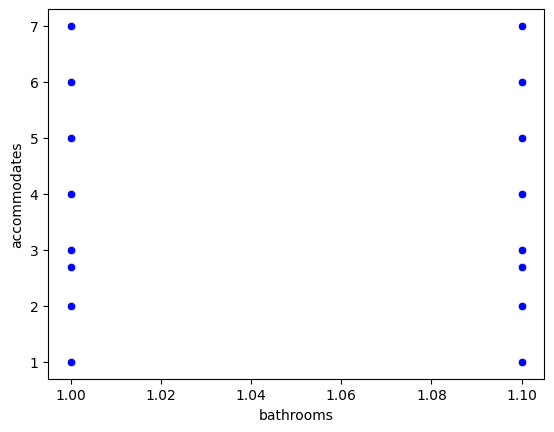

In [31]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [32]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [33]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [34]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [35]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [36]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.63228805]),
 'rank_': 1,
 'singular_': array([2.53803692]),
 'intercept_': 1.3708105460583762}

In [37]:
model2.score(Vars_Indep2,Vars_Dep2)

0.0011844244774819046

In [38]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([2.00309859, 2.0663274 , 2.00309859, ..., 2.0663274 , 2.00309859,
       2.00309859])

In [39]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones            id  \
0          2.003099     170.764113    187.392406  1.701540e+05   
1          2.066327     183.891108    187.392406  1.726720e+05   
2          2.003099     170.764113    181.101470  1.729770e+05   
3          2.003099     183.891108    183.007814  1.873590e+05   
4          2.066327     183.891108    184.914158  1.895820e+05   
...             ...            ...           ...           ...   
2594       2.003099     183.891108    187.392406  1.252160e+18   
2595       2.003099     183.891108    187.392406  1.252190e+18   
2596       2.066327     183.891108    187.392406  1.252220e+18   
2597       2.003099     183.891108    187.392406  1.252300e+18   
2598       2.003099     183.891108    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               within a few hours               100%                 100.0   
1                   within an hour               100%                 100.0   
2                   within an hour               100%                  67.0   
3               within a few hours                90%                  77.0   
4     Estado de manera desconocida               100%                  87.0   
...                            ...                ...                   ...   
2594  Estado de manera desconocida               100%                 100.0   
2595  Estado de manera desconocida               100%                 100.0   
2596  Estado de manera desconocida               100%                 100.0   
2597  Estado de manera desconocida               100%                 100.0   
2598  Estado de manera desconocida               100%                 100.0   

      host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                     1  ...                      4.99                  4.99   
1                     0  ...                      4.83                  4.98   
2                     1  ...                      4.91                  4.89   
3                     0  ...                      4.66                  4.98   
4                     0  ...                      4.86                  4.93   
...                 ...  ...                       ...                   ...   
2594                  0  ...                      5.00                  4.80   
2595                  0  ...                      5.00                  4.80   
2596                  0  ...                      5.00                  4.80   
2597                  0  ...                      5.00                  4.80   
2598                  0  ...                      5.00                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.98                   4.77                4.91   
1                           4.92                   4.86                4.76   
2                           4.88                   4.82                4.79   
3                           4.96                   4.78                4.58   
4                           4.90                   4.64            

<Axes: xlabel='bathrooms', ylabel='accommodates'>

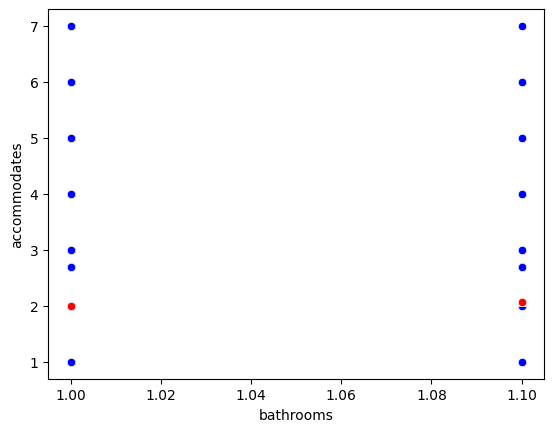

In [40]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.0011844244774819046

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.03441546857856078

**Price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

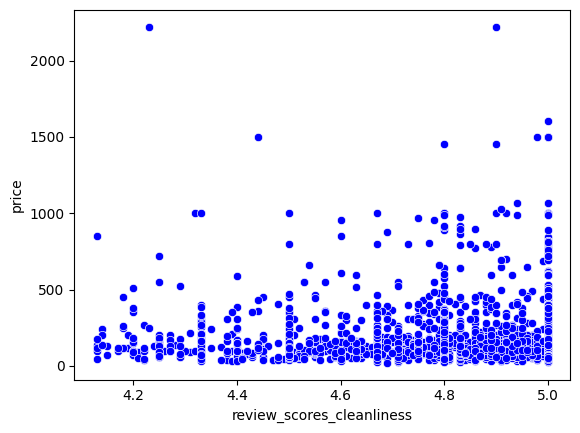

In [43]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [44]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [45]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [46]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [48]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.69482479]),
 'rank_': 1,
 'singular_': array([10.25910806]),
 'intercept_': 158.66309211020368}

In [49]:
model3.score(Vars_Indep3,Vars_Dep3)

2.7543387980943912e-05

In [50]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([182.09026783, 181.33909586, 181.71468184, ..., 182.13721608,
       182.13721608, 182.13721608])

In [51]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones            id  \
0        182.090268       2.003099     170.764113    187.392406  1.701540e+05   
1        181.339096       2.066327     183.891108    187.392406  1.726720e+05   
2        181.714682       2.003099     170.764113    181.101470  1.729770e+05   
3        180.540976       2.003099     183.891108    183.007814  1.873590e+05   
4        181.479941       2.066327     183.891108    184.914158  1.895820e+05   
...             ...            ...            ...           ...           ...   
2594     182.137216       2.003099     183.891108    187.392406  1.252160e+18   
2595     182.137216       2.003099     183.891108    187.392406  1.252190e+18   
2596     182.137216       2.066327     183.891108    187.392406  1.252220e+18   
2597     182.137216       2.003099     183.891108    187.392406  1.252300e+18   
2598     182.137216       2.003099     183.891108    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time host_response_rate  host_acceptance_rate  \
0               within a few hours               100%                 100.0   
1                   within an hour               100%                 100.0   
2                   within an hour               100%                  67.0   
3               within a few hours                90%                  77.0   
4     Estado de manera desconocida               100%                  87.0   
...                            ...                ...                   ...   
2594  Estado de manera desconocida               100%                 100.0   
2595  Estado de manera desconocida               100%                 100.0   
2596  Estado de manera desconocida               100%                 100.0   
2597  Estado de manera desconocida               100%                 100.0   
2598  Estado de manera desconocida               100%                 100.0   

      ...  review_scores_cleanliness review_scores_checkin  \
0     ...                       4.99                  4.99   
1     ...                       4.83                  4.98   
2     ...                       4.91                  4.89   
3     ...                       4.66                  4.98   
4     ...                       4.86                  4.93   
...   ...                        ...                   ...   
2594  ...                       5.00                  4.80   
2595  ...                       5.00                  4.80   
2596  ...                       5.00                  4.80   
2597  ...                       5.00                  4.80   
2598  ...                       5.00                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.98                   4.77                4.91   
1                           4.92                   4.86                4.76   
2                           4.88                   4.82                4.79   
3                           4.96                   4.78                4.58   
4                           4.90                   4.64                4.57   
...                     

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

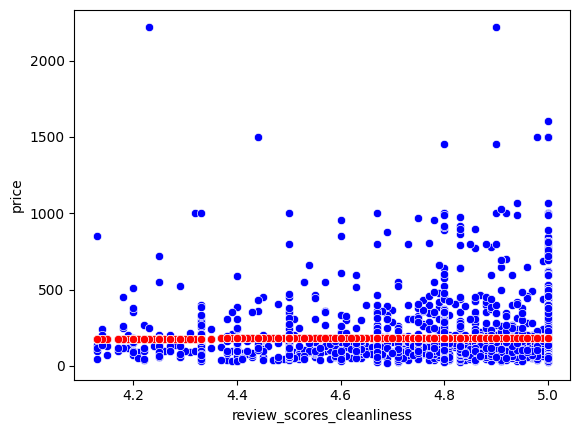

In [52]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

2.7543387980943912e-05

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.0052481794920661694

**price vs instant_bookable**

In [55]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

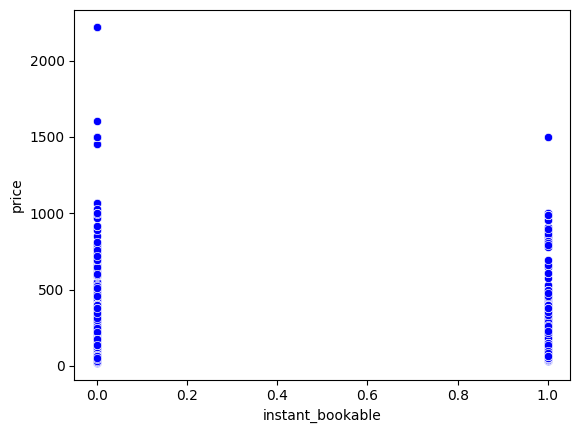

In [56]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [57]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [58]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [59]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [60]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [61]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([73.42765576]),
 'rank_': 1,
 'singular_': array([18.76506705]),
 'intercept_': 169.51996328591105}

In [62]:
model5.score(Vars_Indep5,Vars_Dep5)

0.022541299022961203

In [63]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([169.51996329, 169.51996329, 169.51996329, ..., 169.51996329,
       169.51996329, 169.51996329])

In [64]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  \
0        169.519963     182.090268       2.003099     170.764113   
1        169.519963     181.339096       2.066327     183.891108   
2        169.519963     181.714682       2.003099     170.764113   
3        169.519963     180.540976       2.003099     183.891108   
4        169.519963     181.479941       2.066327     183.891108   
...             ...            ...            ...            ...   
2594     169.519963     182.137216       2.003099     183.891108   
2595     169.519963     182.137216       2.003099     183.891108   
2596     169.519963     182.137216       2.066327     183.891108   
2597     169.519963     182.137216       2.003099     183.891108   
2598     169.519963     182.137216       2.003099     183.891108   

      Predicciones            id  \
0       187.392406  1.701540e+05   
1       187.392406  1.726720e+05   
2       181.101470  1.729770e+05   
3       183.007814  1.873590e+05   
4       184.914158  1.895820e+05   
...            ...           ...   
2594    187.392406  1.252160e+18   
2595    187.392406  1.252190e+18   
2596    187.392406  1.252220e+18   
2597    187.392406  1.252300e+18   
2598    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time host_response_rate  ...  \
0               within a few hours               100%  ...   
1                   within an hour               100%  ...   
2                   within an hour               100%  ...   
3               within a few hours                90%  ...   
4     Estado de manera desconocida               100%  ...   
...                            ...                ...  ...   
2594  Estado de manera desconocida               100%  ...   
2595  Estado de manera desconocida               100%  ...   
2596  Estado de manera desconocida               100%  ...   
2597  Estado de manera desconocida               100%  ...   
2598  Estado de manera desconocida               100%  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                          4.99                   4.99   
1                          4.83                   4.98   
2                          4.91                   4.89   
3                          4.66                   4.98   
4                          4.86                   4.93   
...                         ...                    ...   
2594                       5.00                   4.80   
2595                       5.00                   4.80   
2596                       5.00                   4.80   
2597                       5.00                   4.80   
2598                       5.00                   4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.98                   4.77                4.91   
1                           4.92                   4.86                4.76   
2                           4.88                   4.82                4.79   
3                           4.96                   4.78                4.58   
4                           4.90                   4.64                4.57   

<Axes: xlabel='instant_bookable', ylabel='price'>

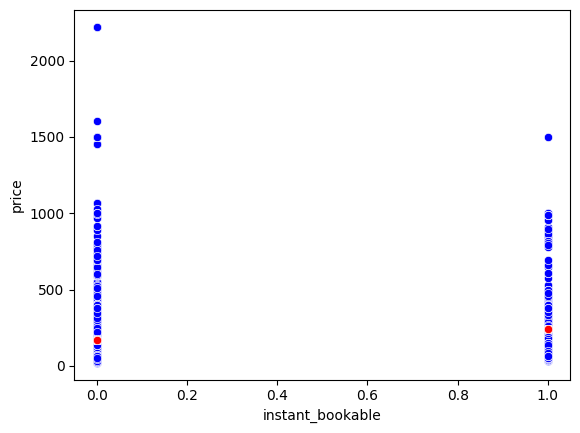

In [65]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [66]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.022541299022961203

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.15013760029706483

**price vs property_type**

In [68]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Private room in home', 'Private room in rental unit',
       'Private room in condo', 'Private room in serviced apartment',
       'Private room in villa', 'Private room', 'Private room in loft',
       'Private room in bed and breakfast', 'Private room in townhouse',
       'Private room in guest suite', 'Room in boutique hotel',
       'Room in aparthotel', 'Private room in hostel', 'Room in hotel',
       'Private room in casa particular',
       'Private room in shipping container',
       'Private room in vacation home', 'Private room in guesthouse',
       'Private room in bungalow', 'Private room in farm stay',
       'Private room in camper/rv', 'Private room in tent'], dtype=object)

In [69]:
# Crear un diccionario de mapeo basado en los tipos de habitación que proporcionaste
tipo_a_numero = {
    'Private room in home': 1,
    'Private room in rental unit': 2,
    'Private room in condo': 3,
    'Private room in serviced apartment': 4,
    'Private room in villa': 5,
    'Private room': 6,
    'Private room in loft': 7,
    'Private room in bed and breakfast': 8,
    'Private room in townhouse': 9,
    'Private room in guest suite': 10,
    'Room in boutique hotel': 11,
    'Room in aparthotel': 12,
    'Private room in hostel': 13,
    'Room in hotel': 14,
    'Private room in casa particular': 15,
    'Private room in shipping container': 16,
    'Private room in vacation home': 17,
    'Private room in guesthouse': 18,
    'Private room in bungalow': 19,
    'Private room in farm stay': 20,
    'Private room in camper/rv': 21,
    'Private room in tent': 22
}

# Aplicar el mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)

<Axes: xlabel='property_type_numerico', ylabel='price'>

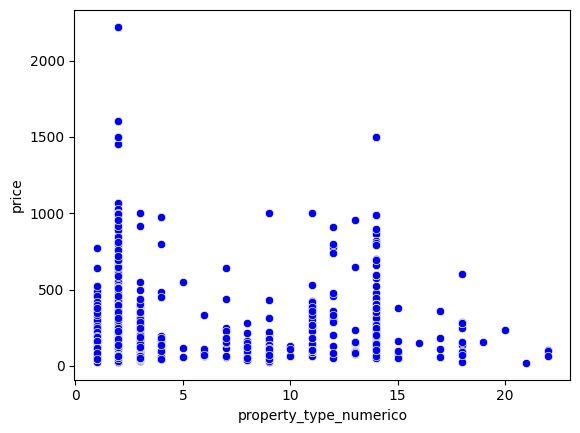

In [70]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

In [71]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [72]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [73]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [74]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [75]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.1341424]),
 'rank_': 1,
 'singular_': array([188.34401163]),
 'intercept_': 150.46549256070318}

In [76]:
model6.score(Vars_Indep6,Vars_Dep6)

0.035139741416132186

In [77]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([159.59963496, 168.73377736, 168.73377736, ..., 223.53863176,
       168.73377736, 168.73377736])

In [78]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        159.599635     169.519963     182.090268       2.003099   
1        168.733777     169.519963     181.339096       2.066327   
2        168.733777     169.519963     181.714682       2.003099   
3        168.733777     169.519963     180.540976       2.003099   
4        168.733777     169.519963     181.479941       2.066327   
...             ...            ...            ...            ...   
2594     168.733777     169.519963     182.137216       2.003099   
2595     168.733777     169.519963     182.137216       2.003099   
2596     223.538632     169.519963     182.137216       2.066327   
2597     168.733777     169.519963     182.137216       2.003099   
2598     168.733777     169.519963     182.137216       2.003099   

      Predicciones1  Predicciones            id  \
0        170.764113    187.392406  1.701540e+05   
1        183.891108    187.392406  1.726720e+05   
2        170.764113    181.101470  1.729770e+05   
3        183.891108    183.007814  1.873590e+05   
4        183.891108    184.914158  1.895820e+05   
...             ...           ...           ...   
2594     183.891108    187.392406  1.252160e+18   
2595     183.891108    187.392406  1.252190e+18   
2596     183.891108    187.392406  1.252220e+18   
2597     183.891108    187.392406  1.252300e+18   
2598     183.891108    187.392406  1.252330e+18   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/170154  14/04/2010   
1                  https://www.airbnb.com/rooms/172672  15/07/2011   
2                  https://www.airbnb.com/rooms/172977  16/07/2011   
3                  https://www.airbnb.com/rooms/187359  01/08/2011   
4                  https://www.airbnb.com/rooms/189582  03/08/2011   
...                                                ...         ...   
2594  https://www.airbnb.com/rooms/1252161427109288199  04/06/2015   
2595  https://www.airbnb.com/rooms/1252186062122888637  03/04/2024   
2596  https://www.airbnb.com/rooms/1252221965097369365  23/09/2024   
2597  https://www.airbnb.com/rooms/1252302783564354993  24/01/2018   
2598  https://www.airbnb.com/rooms/1252332854831287401  08/01/2024   

                host_response_time  ... review_scores_checkin  \
0               within a few hours  ...                  4.99   
1                   within an hour  ...                  4.98   
2                   within an hour  ...                  4.89   
3               within a few hours  ...                  4.98   
4     Estado de manera desconocida  ...                  4.93   
...                            ...  ...                   ...   
2594  Estado de manera desconocida  ...                  4.80   
2595  Estado de manera desconocida  ...                  4.80   
2596  Estado de manera desconocida  ...                  4.80   
2597  Estado de manera desconocida  ...                  4.80   
2598  Estado de manera desconocida  ...                  4.80   

      review_scores_communication  review_scores_location review_scores_value  \
0                            4.98                    4.77                4.91   
1                            4.92                    4.86                4.76   
2                            4.88                    4.82                4.79   
3                            4.96                    4.78                4.58   
4                            4.90                    4.64                4.57   
...                           ...                     ...                 ...   
2594                         5.00                    4.90                5.00   
2595                         5.00                    4.90                5.00   
2596                         5.00                    4.90                5.00   
2597                         5.00                    4.90                5.00   
2598                         5.00                    4.90      

<Axes: xlabel='property_type_numerico', ylabel='price'>

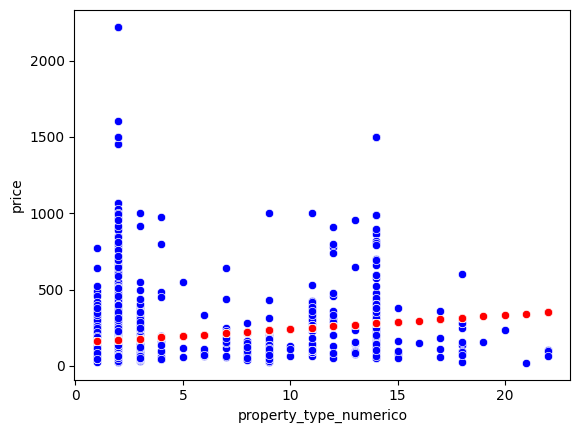

In [79]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.035139741416132186

In [81]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.18745597194043243